<a href="https://colab.research.google.com/github/ShivaniMareddy/RandomForest/blob/main/DT_RF_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/house_data.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

y = df['price']


In [ ]:
X = X.fillna(X.mean())


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Decision Tree Results")
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE:", mse_dt)
print("R2 :", r2_score(y_test, y_pred_dt))


Decision Tree Results
MSE: 1052121827350.4335
R2 : -0.03164740215739448


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)


In [ ]:
print("\nRandom Forest Results")
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE:", mse_rf)
print("R2 :", r2_score(y_test, y_pred_rf))



Random Forest Results
MSE: 991775851992.8134
R2 : 0.027524232809177818


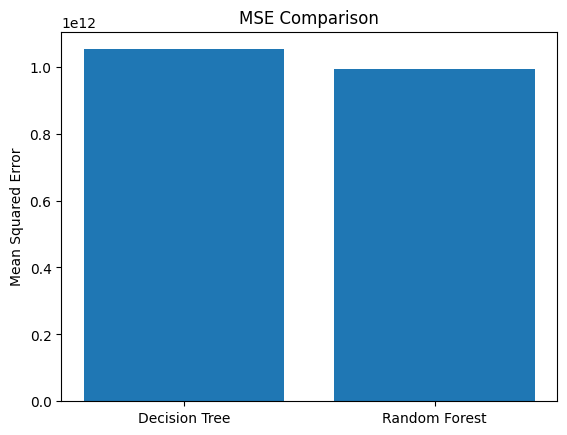

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(['Decision Tree', 'Random Forest'], [mse_dt, mse_rf])
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.show()

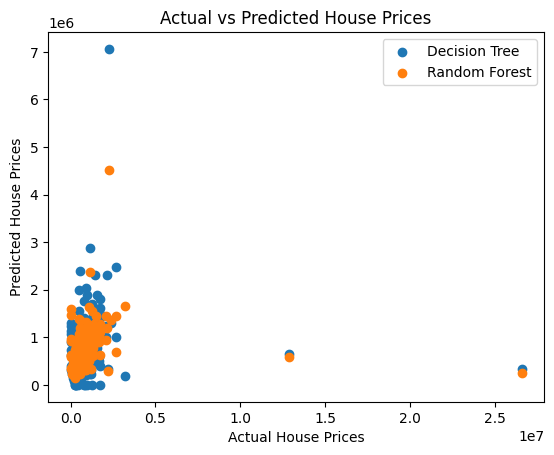

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# Decision Tree predictions
plt.scatter(y_test, y_pred_dt, label="Decision Tree")

# Random Forest predictions
plt.scatter(y_test, y_pred_rf, label="Random Forest")

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")

plt.legend()
plt.show()
